# CAJAL2025

## Data

To begin with, we **visualize neural firing data** from the primary visual cortex (V1) of a macaque [(Freeman & Ziemba, 2013)](https://www.nature.com/articles/nn.3402). V1 is known to encode low-level features of visual stimuli, such as texture. To assess this, we apply a technique known as **linear readout** or **linear probing**. This method involves training a simple linear classifier, such as logistic regression or a support vector machine, on neural activity to predict stimulus features.

**Before you begin**, make sure you have all dependencies installed (see `requirements.txt` in this week's folder). You can install them by executing the following block. (The following code might require you to *restart runtime*, which is fine)

In [141]:
!pip install jupyter brainscore-vision matplotlib brainio

### Loading, Inspecting, & Visualizing

#### Brain data with BrainScore

At the current state, it can unfortunately often be difficult to access brain recordings. Not all groups share their data (although new regulations are improving this), and even if the data is accessible it is often difficult to interact with due to non-standard file formats, missing/unclear metadata, and obscure processing pipelines.

That being said, we will here save you the headache by starting from a packaged and standardized dataset.
This data was first published by [Freeman* & Ziemba* et al. 2013](https://www.nature.com/articles/nn.3402) and subsequently packaged into the **[Brain-Score](www.brain-score.org)** platform.
The format of the data here is in [xarray](https://xarray.dev), a structure allowing for multi-dimensional data with multiple metadata along all dimensions. If you know pandas, xarray is the multi-dimensional extension of it. Check basics of xarray [here](https://tutorial.xarray.dev/overview/xarray-in-45-min.html) and pandas [here](https://www.w3schools.com/python/pandas/default.asp).

In [1]:
%matplotlib inline
import brainscore_vision

# brainscore will download the data for you
data = brainscore_vision.load_dataset('FreemanZiemba2013.public')

# we'll focus on only V1 recordings in this exercise
v1_data = data.sel(region='V1')

# By just typing the name of a variable, jupyter will show its content.
# In this case, the xarray 'v1_data' will be presented with (scroll in the below to have a full view; toggle on the left to show/hide them):
#   1. basics of this data structure: bytes, shape, data type, etc.
#   2. a graphical representation of its different dimensions
#   3. a section called 'coordinates' that shows the names of the dimensions and their associated values
v1_data

/usr/local/lib/python3.11/dist-packages/brainscore_core/metrics/__init__.py:16: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):
brainscore-storage/brainio-brainscore/assy_movshon_FreemanZiemba2013_public.nc: 100%|██████████| 1.33G/1.33G [00:18<00:00, 71.6MB/s]
brainscore-storage/brainio-brainscore/stimulus_FreemanZiemba2013_aperture-public.csv: 100%|██████████| 27.9k/27.9k [00:00<00:00, 45.9kB/s]
brainscore-storage/brainio-brainscore/stimulus_FreemanZiemba2013_aperture-public.zip: 100%|██████████| 5.31M/5.31M [00:02<00:00, 2.64MB/s]


<xarray.NeuronRecordingAssembly 'movshon.FreemanZiemba2013.public' (
                                                                    neuroid_id: 102,
                                                                    time_bin: 300,
                                                                    presentation: 2700)>
dask.array<getitem, shape=(102, 300, 2700), dtype=float64, chunksize=(102, 300, 2700), chunktype=numpy.ndarray>
Coordinates:
  * neuroid_id                 (neuroid_id) int64 1 2 3 4 5 ... 99 100 101 102
  * time_bin                   (time_bin) MultiIndex
  - time_bin_start             (time_bin) int64 0 1 2 3 4 ... 296 297 298 299
  - time_bin_end               (time_bin) int64 1 2 3 4 5 ... 297 298 299 300
  * presentation               (presentation) MultiIndex
  - repetition                 (presentation) int64 0 1 2 3 4 ... 15 16 17 18 19
  - image_id                   (presentation) object 'dfa618e0503a4251582450e...
  - stimulus_id                (presentation) object 'dfa618e0503a4251582450e...
  - sample                     (presentation) int64 2 2 2 2 2 2 ... 2 2 2 2 2 2
  - filename                   (presentation) object 'noise-320x320-im327-smp...
  - image_file_sha1            (presentation) object 'dfa618e0503a4251582450e...
  - image_file_name            (presentation) object 'noise-320x320-im327-smp...
  - texture_family             (presentation) int64 327 327 327 327 ... 71 71 71
  - resolution                 (presentation) object '320x320' ... '320x320'
  - id                         (presentation) int64 133388 133388 ... 133334
  - image_id_without_aperture  (presentation) object '0e8609dc2778a848d7ed8b3...
  - texture_type               (presentation) object 'noise' ... 'texture'
Attributes:
    stimulus_set_identifier:  FreemanZiemba2013.aperture-public
    stimulus_set:                                                  image_id  ...
    identifier:               movshon.FreemanZiemba2013.public

Let's get a basic understanding of the neural recording by examining the *coordinates*.

How many presentation trials? --> 2700 (20 repetitions per image and 135 unique images).

How many neural sites? --> 102 sites in V1.

The temporal resolution of the recording is 1 ms per time bin. Then, how long is each trial? --> 300ms.

Each *neural site* is recorded using a single quartz-platinum-tungsten microelectrode implanted in the macaque brain. Do you think each neural site records the activity of a single neuron, or could it capture signals from multiple neurons? Explain your reasoning. --> The electrodes capture both action potentials (single-unit activity) from nearby neurons and local field potentials (LFPs), which reflect the summed synaptic activity of multiple neurons.

#### Stimuli

How did this data come about in the first place? Primate subjects were presented with images while experimenters were recording from early visual cortex.

What are those images?

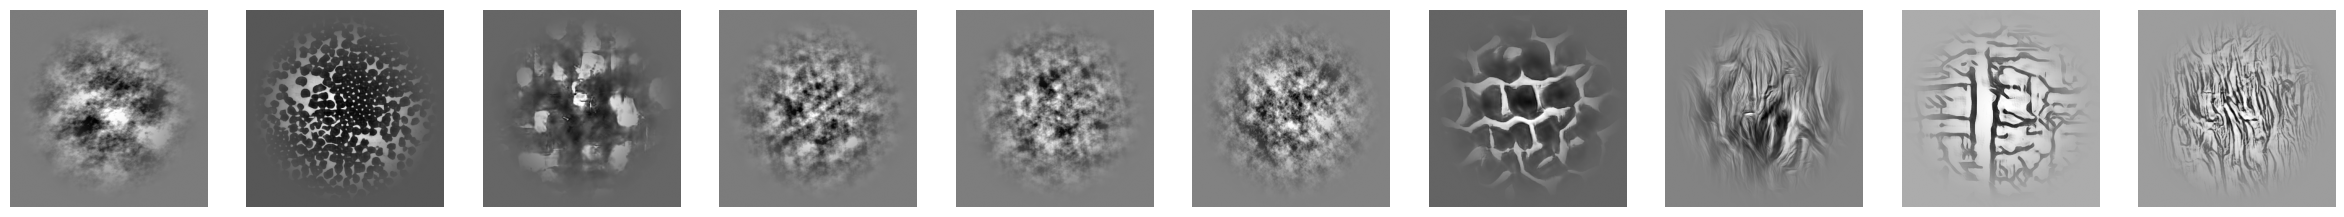

In [5]:
%matplotlib inline
from matplotlib import pyplot, image

# The xarray 'v1_data' has 3 attributes (accesse all of them by 'v1_data.attrs')
#   1. stimulus_set_identifier: name of the stimulus set
#   2. stimulus_set: a brainscore StimulusSet (a subclass of pandas.Dataframe) that records all the information about the stimulus set
#   3. identifier: name of the whole experiment
stimuli = v1_data.stimulus_set

# a shortcut to access the *first* stimulus is in the stimulus set
single_stimulus_id = stimuli['stimulus_id'].values[0]
# note that the 'stimulus_id's are also present in the coordinates of the xarray 'v1_data'.
# however, generally those ones are in arbitrary order and the same stimlus_id can be repeated.
# therefore, it is better to access the 'stimulus_id' from the stimulus set.

fig, axes = pyplot.subplots(nrows=1, ncols=10, figsize=(30, 3))
for i, ax in enumerate(axes.flatten()):
    current_stimulus_id = stimuli['stimulus_id'].values[i]  # accessing a stimulus
    # use a method 'get_stimulus' of StimulusSet to get the stimulus storage path given the id
    image_path = stimuli.get_stimulus(current_stimulus_id)
    # show the image using matplotlib
    image_content = image.imread(image_path)
    ax.imshow(image_content, cmap='gray')
    ax.set_axis_off()
pyplot.show()

#### Brain data visualization

Now that we've seen the images shown to the macaques, let's check the neural activity recorded in V1. It's always a good idea to first plot the raw activity data before running any complex analysis. This helps ensure the data looks as expected and there are no obvious issues.

Let's start with the response to the single stimulus that we visualized in the previous section.

In [9]:
single_stimulus_id = stimuli['stimulus_id'].values[0]

# xarray.sel method allows slicing the currency xarray along one/multiple coordinate(s) or dimension(s)
stimulus_data = v1_data.sel(stimulus_id=single_stimulus_id)

# before executing, think about the shape/coordinates of this xarray
# this time we skip printing the attributes
def inspect_without_attrs(xarray):
    tmp = xarray.copy()
    tmp.attrs = {}
    return tmp

inspect_without_attrs(stimulus_data)

<xarray.NeuronRecordingAssembly 'movshon.FreemanZiemba2013.public' (
                                                                    neuroid_id: 102,
                                                                    time_bin: 300,
                                                                    presentation: 20)>
dask.array<getitem, shape=(102, 300, 20), dtype=float64, chunksize=(102, 300, 20), chunktype=numpy.ndarray>
Coordinates:
  * neuroid_id                 (neuroid_id) int64 1 2 3 4 5 ... 99 100 101 102
  * time_bin                   (time_bin) MultiIndex
  - time_bin_start             (time_bin) int64 0 1 2 3 4 ... 296 297 298 299
  - time_bin_end               (time_bin) int64 1 2 3 4 5 ... 297 298 299 300
  * presentation               (presentation) MultiIndex
  - repetition                 (presentation) int64 0 1 2 3 4 ... 15 16 17 18 19
  - image_id                   (presentation) object '21041db1f26c142812a6627...
  - sample                     (presentation) int64 5 5 5 5 5 5 ... 5 5 5 5 5 5
  - filename                   (presentation) object 'noise-320x320-im38-smp5...
  - image_file_sha1            (presentation) object '21041db1f26c142812a6627...
  - image_file_name            (presentation) object 'noise-320x320-im38-smp5...
  - texture_family             (presentation) int64 38 38 38 38 ... 38 38 38 38
  - resolution                 (presentation) object '320x320' ... '320x320'
  - id                         (presentation) int64 133032 133032 ... 133032
  - image_id_without_aperture  (presentation) object '6ddcf4b55f9151ac7725070...
  - texture_type               (presentation) object 'noise' 'noise' ... 'noise'

We see that this single stimulus was shown a total of 20 times (repetitions), has 102 neural sites recorded, and was collected over 300 time-bins (in this case 1 ms each).
In visual neuroscience, repeated trials are usually conducted to average out noise. Let's do just that by averaging all the repetitions.

In [10]:
from brainscore_vision.benchmark_helpers.neural_common import average_repetition

# average over repeated repetitions of the same stimulus using the brainscore function
averaged_stimulus_data = average_repetition(stimulus_data)

# remove (or 'squeeze') the singleton dimension after the averaging along it
averaged_stimulus_data = averaged_stimulus_data.squeeze('presentation')

inspect_without_attrs(averaged_stimulus_data)

<xarray.NeuronRecordingAssembly 'movshon.FreemanZiemba2013.public' (
                                                                    neuroid_id: 102,
                                                                    time_bin: 300)>
dask.array<getitem, shape=(102, 300), dtype=float64, chunksize=(102, 300), chunktype=numpy.ndarray>
Coordinates:
  * neuroid_id      (neuroid_id) int64 1 2 3 4 5 6 7 ... 96 97 98 99 100 101 102
  * time_bin        (time_bin) MultiIndex
  - time_bin_start  (time_bin) int64 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  - time_bin_end    (time_bin) int64 1 2 3 4 5 6 7 ... 295 296 297 298 299 300
    presentation    object ('21041db1f26c142812a66277c2957fb3e2070916', 5, 'n...

Now we visualize the averaged recordings for this specific stimulus:

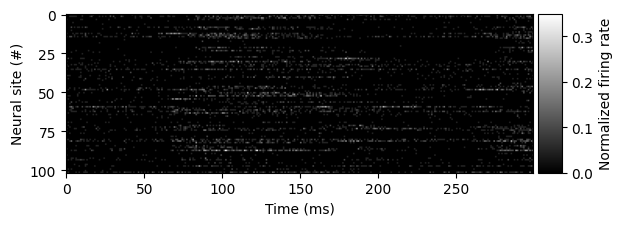

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = pyplot.subplots()
colormap = ax.imshow(averaged_stimulus_data.transpose('neuroid_id', 'time_bin').values, cmap='gray')

def add_colorbar(fig, ax, colormap):
    divider = make_axes_locatable(ax)  # make space for colorbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    colorbar = fig.colorbar(colormap, cax=ax_colorbar)
    colorbar.set_label('Normalized firing rate')

add_colorbar(fig, ax, colormap)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Neural site (#)')
pyplot.show()

Cool! Lots of activity. But always think of what the 'time' and 'neural site' dimension mean. This will be helpful.

This was for one single stimulus, let's see what the data looks like on average across all the stimuli.

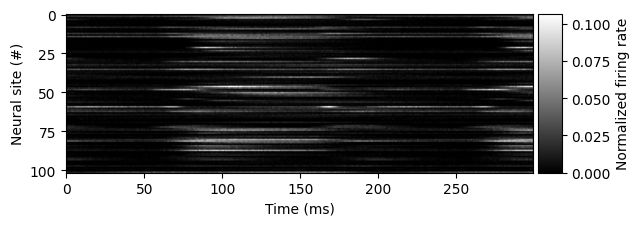

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = pyplot.subplots()

# average over all stimuli, all repetitions
averaged_v1_data = v1_data.mean('presentation')

colormap = ax.imshow(averaged_v1_data.transpose('neuroid_id', 'time_bin').values, cmap='gray')
add_colorbar(fig, ax, colormap)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Neural site (#)')
pyplot.show()

There is another way to show these activity patterns: plotting them as timeseries.

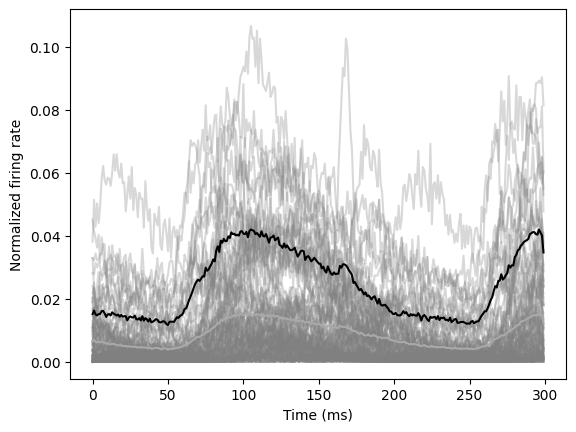

In [13]:
averaged_v1_data.load()  # make sure all data is loaded (sometimes the xarray is lazily loaded)

fig, ax = pyplot.subplots()
time_bins = averaged_v1_data['time_bin_start'].values

# plot individual sites
neural_sites = averaged_v1_data['neuroid_id'].values
for neural_site in neural_sites:

    # here we demonstrate an example of multi-slicing in xarray, even if in this case it is not necessary.
    # xarray.sel does not directly support slicing with multiple values, but this can be achieved in two ways:
    match_mask = [neuroid_id == neural_site for neuroid_id in neural_sites]  # a binary mask
    match_idx = [i for i, neuroid_id in enumerate(neural_sites) if neuroid_id == neural_site]  # a list of indices

    # the *first* way:
    site_data = averaged_v1_data[{'neuroid_id': match_mask}]
    # or
    site_data = averaged_v1_data[{'neuroid_id': match_idx}]

    # the *second* way:
    site_data = averaged_v1_data.isel(neuroid_id=match_mask)
    # or
    site_data = averaged_v1_data.isel(neuroid_id=match_idx)

    # more information on xarray slicing at: https://docs.xarray.dev/en/latest/user-guide/indexing.html#vectorized-indexing

    site_data = site_data.squeeze()
    ax.plot(time_bins, site_data.values, color='gray', alpha=0.3)

# also plot site average
site_average = averaged_v1_data.mean('neuroid_id')
ax.plot(time_bins, site_average.values, color='darkgray')

# and the sites that are more active -- let's say the sites that at some point are active above 0.05
active_sites = (averaged_v1_data > 0.05).any('time_bin')
active_sites = averaged_v1_data[{'neuroid_id': active_sites}].mean('neuroid_id')
ax.plot(time_bins, active_sites.values, color='black')

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Normalized firing rate')
pyplot.show()

What happens at time=0ms? --> When the stimulus is first shown.

When are most neural sites start to become active? --> Around 70ms.

Why does it take time for sites to become active? --> Transmission between biological neurons is non-instantaneous.

You guess: why is there activity again at around 270ms? --> Each image was shown for 100ms followed by 100ms gray followed by the next image. I.e. the next image comes on at 200ms, the data is slightly overlapping across trials.

You guess: why do some sites show small activity (e.g. towards the bottom)? --> Could be hardware deficits, sites that are not visually driven, or not driven by the stimuli (blood vessels / connective tissue) shown in this experiment.

#### Bonus: Reproducing a figure from the paper

In the original [paper](https://www.nature.com/articles/nn.3402) we took the data from, Figure 2b identifies a contrast of neural responses to noise and naturalistic stimuli between neural sites in V1 and V2.
In other words, the neural activity shows different patterns across different stimulus types: texture *vs.* noise.

With our data processing so far, we can reproduce this figure.

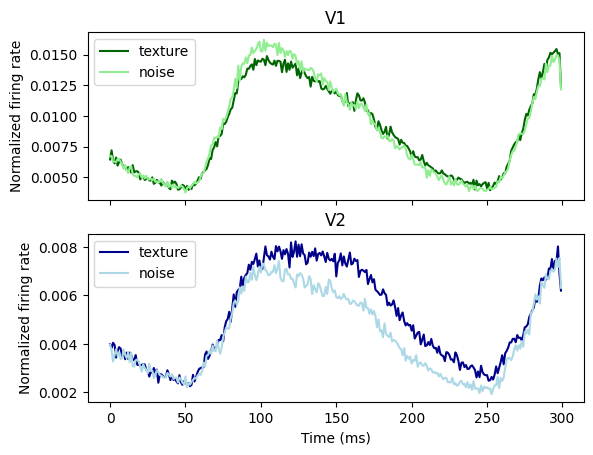

In [14]:
from brainio.assemblies import NeuronRecordingAssembly

full_data = brainscore_vision.load_dataset('FreemanZiemba2013.public')  # make sure we have both the V1 and V2 data again

def process_data(data: NeuronRecordingAssembly) -> tuple[NeuronRecordingAssembly, NeuronRecordingAssembly]:
    data = data.mean('neuroid_id')
    # note that in the paper these values are further normalized by each site's maximum firing rate
    data.load()  # make sure data is loaded
    texture_data = data.sel(texture_type='texture').mean('presentation')
    noise_data = data.sel(texture_type='noise').mean('presentation')
    return texture_data, noise_data

v1_data = full_data.sel(region='V1')
v2_data = full_data.sel(region='V2')

fig, axes = pyplot.subplots(nrows=2)

for title, ax, data, base_color in zip(
        ['V1', 'V2'], axes, [v1_data, v2_data], ['green', 'blue']):
    texture_data, noise_data = process_data(data)
    time_bins = data['time_bin_start'].values
    ax.plot(time_bins, texture_data.values, color=f"dark{base_color}", label='texture')
    ax.plot(time_bins, noise_data.values, color=f"light{base_color}", label='noise')
    ax.legend()
    ax.set_title(title)
    ax.set_ylabel('Normalized firing rate')
    if title == 'V2':
        ax.set_xlabel('Time (ms)')
    else:
        ax.xaxis.set_ticklabels([])  # hide tick labels on top plot
pyplot.show()

### Linear probing

Since neural firing patterns vary with different stimuli, we want to understand what information these patterns truly encode about the stimuli.

A very common technique to investigate the informational content of data is to see if a linear regression can predict some variables of interests.

In our case, we're interested in whether V1 activity can predict if the stimuli contain texture or if they are simply pure noise.

#### Time-averaging

To make things simpler, we will average out the time dimension from now on.

In other words, we assume that the time-averaged activity magnitude, without considering dynamics, already encodes texture information.

As we observed before, most of the interesting signal is localized to 50-200ms. Let's average out the time dimension in that range so that we can focus on this signal. We also again average over the repetitions of each stimulus.

In [15]:
from brainscore_vision.benchmark_helpers.neural_common import average_repetition

def average_time_range(data, time_window):
    data = data.sel(time_bin=[(t, t + 1) for t in range(*time_window)])
    data = data.mean(dim='time_bin', keep_attrs=True)
    return data

time_average = average_time_range(v1_data, time_window = (50, 200))
v1_average = average_repetition(time_average)
inspect_without_attrs(v1_average)

<xarray.NeuronRecordingAssembly 'movshon.FreemanZiemba2013.public' (
                                                                    neuroid_id: 102,
                                                                    presentation: 135)>
dask.array<transpose, shape=(102, 135), dtype=float64, chunksize=(102, 1), chunktype=numpy.ndarray>
Coordinates:
  * neuroid_id                 (neuroid_id) int64 1 2 3 4 5 ... 99 100 101 102
  * presentation               (presentation) MultiIndex
  - image_id                   (presentation) object '00b8ffbd5d99263c71762f8...
  - stimulus_id                (presentation) object '00b8ffbd5d99263c71762f8...
  - sample                     (presentation) int64 9 3 2 12 15 ... 13 6 9 10 7
  - filename                   (presentation) object 'noise-320x320-im48-smp9...
  - image_file_sha1            (presentation) object '00b8ffbd5d99263c71762f8...
  - image_file_name            (presentation) object 'noise-320x320-im48-smp9...
  - texture_family             (presentation) int64 48 60 71 393 ... 23 52 99
  - resolution                 (presentation) object '320x320' ... '320x320'
  - id                         (presentation) int64 133313 133422 ... 133210
  - image_id_without_aperture  (presentation) object 'c3f8b361da8a42c440a46f2...
  - texture_type               (presentation) object 'noise' ... 'noise'

Now without the time dimension, we're left with the responses 102 V1 neural sites to 135 stimuli.

We can visualize this again using an 'imshow' plot, but please note that the axes have changed compared to the previous plots.

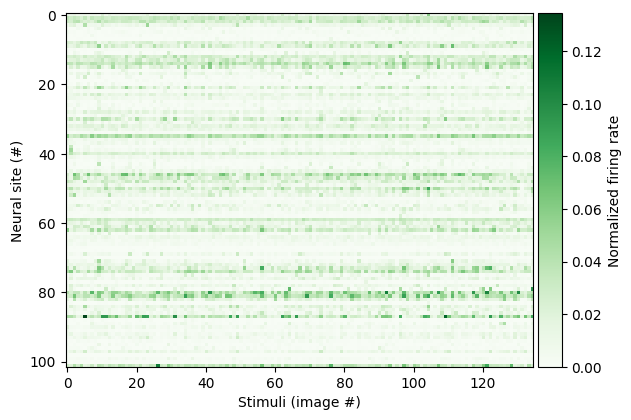

In [16]:
fig, ax = pyplot.subplots()
colormap = ax.imshow(v1_average.values, cmap='Greens')
add_colorbar(fig, ax, colormap)
ax.set_xlabel('Stimuli (image #)')
ax.set_ylabel('Neural site (#)')
pyplot.show()

Arguably it's not super obvious how much signal there is that is specific to images. We will analyze this in detail in the next few steps.

#### Predicting/decoding the texture types

For this dataset, there are two types of stimuli: 'noise' images and 'texture' images. Let's see if we can differentiate among them using the V1 neural data.

Concretely, we fit a classifier that predicts the texture type based on the neural firing rates.
We want to see if we can really *predict* unseen data. Therefore, we split our data into a `train` and a `validation` split. We train the classifier only on the `train` split. Then, we check if the trained classifier has high accuracy on the `validation` split.

The scikit-learn package has some great utilities for such simple classic machine learning tools.

Note: In research, we would also use an additional `test` split that we hold out altogether and only analyze at the very end when all model parameters are locked in, to avoid implicit overfitting to the data.


In [17]:
from sklearn.model_selection import train_test_split

# a shortcut for getting all the stimulus ids as a numpy array
stimulus_ids = v1_average['stimulus_id'].values

# use 80% for training, 20% for validation
train_stimuli, val_stimuli = train_test_split(stimulus_ids, train_size=0.8, random_state=3)

# see more information on xarray slice at: https://docs.xarray.dev/en/latest/user-guide/indexing.html#vectorized-indexing
# first way:
train_data = v1_average[{"presentation": [stimulus_id in train_stimuli for stimulus_id in stimulus_ids]}]
val_data = v1_average[{"presentation": [stimulus_id in val_stimuli for stimulus_id in stimulus_ids]}]

What's chance accuracy on this dataset?

In [18]:
from numpy.random import RandomState

train_y = train_data['texture_type'].values
random_baseline = RandomState(seed=42).choice(train_y, replace=False, size=len(train_y))
chance_accuracy = (random_baseline == train_y).mean()
print("chance performance is", chance_accuracy)

chance performance is 0.5


Note that chance is actually exactly 50% in this specific case; depending on randomness one run of this might give values slightly below/above 0.5.  

Now we train a linear regression from the train brain data to the train stimulus types.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

linear_readout = LogisticRegression()

# sometimes xarray can be used as a numpy array, but you need to be careful about the shape
train_x = train_data.transpose('presentation', 'neuroid_id').values
train_y = train_data['texture_type'].values

# normalize data
scaler = StandardScaler().fit(train_x)
train_x = scaler.transform(train_x)

# fit the decoder
linear_readout.fit(train_x, train_y)

# double-checking that the fitting worked
train_predictions = linear_readout.predict(train_x)
train_accuracy = (train_predictions == train_y).mean()
print("train accuracy is", train_accuracy)

train accuracy is 1.0


Great, we were able to (over)fit the training data. How well does this work on the validation data?

In [20]:
val_x = scaler.transform(val_data.transpose('presentation', 'neuroid_id').values)
val_y = val_data['texture_type'].values
val_accuracy = linear_readout.score(val_x, val_y)
print("validation accuracy is", val_accuracy)

validation accuracy is 0.7407407407407407


Not so bad.

Why did we not get 100% validation accuracy? --> noisy data, imperfect classifier, generalization to unseen data

How could you improve the accuracy of the classifier? --> filter noisy neural sites, collect more neural data, regularization.

Taking the [paper](https://www.nature.com/articles/nn.3402)'s Figure 2 into account, do you think the classifier performance with V2 data would be different than with V1? --> likely higher since V2 neurons seem to more strongly differentiate between noise and texture images.

## Modeling

Next, we move on to the modeling step, where we aim to build models that, given the same stimulus (visual, auditory, etc.), can accurately predict the neural responses in one or more brain regions.

One might naturally consider training a neural network to directly predict neural signals. However, a key concern with this approach is the sparsity of neural recordings—particularly with the electrophysiological data we are using here. Out of the hundreds of millions of neurons in V1, we are sampling only on the order of hundreds. This extreme undersampling raises a serious risk of overfitting if we train a model directly on such limited data.

Another common starting point is to use a **task-driven framework**. Since the ventral visual stream is known to support object recognition, a model trained to perform the same task may develop representations that resemble those in the brain.

Here, we test this idea using the classic *AlexNet*.

In [137]:
# download activations from AlexNet
!wget -nv https://github.com/epflneuroailab/cajal2025/raw/refs/heads/main/cajal2025/alexnet_freemanziemba2013_features.12.nc
!wget -nv https://github.com/epflneuroailab/cajal2025/raw/refs/heads/main/cajal2025/alexnet_freemanziemba2013_features.7.nc
!wget -nv https://github.com/epflneuroailab/cajal2025/raw/refs/heads/main/cajal2025/alexnet_freemanziemba2013_features.2.nc
!wget -nv https://github.com/epflneuroailab/cajal2025/raw/refs/heads/main/cajal2025/alexnet_majajhong2015_features.12.nc
!wget -nv https://github.com/epflneuroailab/cajal2025/raw/refs/heads/main/cajal2025/alexnet_majajhong2015_features.7.nc
!wget -nv https://github.com/epflneuroailab/cajal2025/raw/refs/heads/main/cajal2025/alexnet_majajhong2015_features.2.nc

2025-06-26 11:21:19 URL:https://raw.githubusercontent.com/epflneuroailab/cajal2025/refs/heads/main/cajal2025/alexnet_freemanziemba2013_features.12.nc [7677293/7677293] -> "alexnet_freemanziemba2013_features.12.nc.3" [1]
2025-06-26 11:21:21 URL:https://raw.githubusercontent.com/epflneuroailab/cajal2025/refs/heads/main/cajal2025/alexnet_freemanziemba2013_features.7.nc [53329773/53329773] -> "alexnet_freemanziemba2013_features.7.nc.2" [1]
2025-06-26 11:21:22 URL:https://raw.githubusercontent.com/epflneuroailab/cajal2025/refs/heads/main/cajal2025/alexnet_freemanziemba2013_features.2.nc [38377463/38377463] -> "alexnet_freemanziemba2013_features.2.nc.2" [1]
2025-06-26 11:21:23 URL:https://raw.githubusercontent.com/epflneuroailab/cajal2025/refs/heads/main/cajal2025/alexnet_majajhong2015_features.12.nc [7715121/7715121] -> "alexnet_majajhong2015_features.12.nc.2" [1]
2025-06-26 11:21:24 URL:https://raw.githubusercontent.com/epflneuroailab/cajal2025/refs/heads/main/cajal2025/alexnet_majajhong20

### Activations from AlexNet

To save time, we provide the activations from three different layers of AlexNet computed on the same stimulus set (`FreemanZiemba2013.public`) used for the V1 recordings.

In [158]:
import xarray as xr
from brainio.assemblies import NeuroidAssembly

layers = [
    "features.2",
    "features.7",
    "features.12",
]  # in ascending hierarchy


alexnet_assemblies = {}
for layer in layers:
    alexnet_assemblies[layer] = NeuroidAssembly(xr.open_dataarray(f"alexnet_freemanziemba2013_{layer}.nc"))

In [159]:
# let's check one activation assembly we have, from the layer features.12
inspect_without_attrs(alexnet_assemblies["features.12"])

<xarray.NeuroidAssembly (presentation: 135, neuroid: 9216)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75484663, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.5978829 , 1.9798157 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
Coordinates:
  * presentation                  (presentation) MultiIndex
  - image_id                      (presentation) object '21041db1f26c142812a6...
  - resolution                    (presentation) object '320x320' ... '320x320'
  - image_file_name               (presentation) object 'noise-320x320-im38-s...
  - microsaccade_shift_y_degrees  (presentation) float64 0.0 0.0 0.0 ... 0.0 0.0
  - filename                      (presentation) object 'noise-320x320-im38-s...
  - microsaccade_shift_y_pixels   (presentation) float64 0.0 0.0 0.0 ... 0.0 0.0
  - image_id_without_aperture     (presentation) object '6ddcf4b55f9151ac7725...
  - texture_family                (presentation) int64 38 393 30 18 ... 56 48 30
  - stimulus_id                   (presentation) object '21041db1f26c142812a6...
  - id                            (presentation) int64 133032 133033 ... 133473
  - sample                        (presentation) int64 5 15 3 13 12 ... 8 6 6 10
  - texture_type                  (presentation) object 'noise' ... 'texture'
  - image_file_sha1               (presentation) object '21041db1f26c142812a6...
  - microsaccade_shift_x_pixels   (presentation) float64 0.0 0.0 0.0 ... 0.0 0.0
  - microsaccade_shift_x_degrees  (presentation) float64 0.0 0.0 0.0 ... 0.0 0.0
  * neuroid                       (neuroid) MultiIndex
  - neuroid_num                   (neuroid) int64 0 1 2 3 ... 9213 9214 9215
  - model                         (neuroid) object 'alexnet' ... 'alexnet'
  - layer                         (neuroid) object 'features.12' ... 'feature...
  - channel                       (neuroid) int64 0 0 0 0 0 ... 255 255 255 255
  - channel_x                     (neuroid) int64 0 0 0 0 0 0 1 ... 5 5 5 5 5 5
  - channel_y                     (neuroid) int64 0 1 2 3 4 5 0 ... 0 1 2 3 4 5
  - neuroid_id                    (neuroid) object 'alexnet.features.12.0' .....
  - region                        (neuroid) object 'IT' 'IT' 'IT' ... 'IT' 'IT'

In [160]:
# and compare the assembly from the model vs. that from the macaque
for layer in layers:
    print(f"AlexNet layer {layer}: {alexnet_assemblies[layer].sizes}")

print(f"V1 averaged data: {v1_average.sizes}")

AlexNet layer features.2: Frozen({'presentation': 135, 'neuroid': 46656})
AlexNet layer features.7: Frozen({'presentation': 135, 'neuroid': 64896})
AlexNet layer features.12: Frozen({'presentation': 135, 'neuroid': 9216})
V1 averaged data: Frozen({'neuroid_id': 102, 'presentation': 135})


In [161]:
# IMPORTANT: before everything, let's first ensure that the assemblies from both
# sides are aligned in terms of the ordering of presentations
for layer in layers:
    alexnet_assemblies[layer] = alexnet_assemblies[layer].sortby('stimulus_id')
    assert (alexnet_assemblies[layer]['stimulus_id'].values == v1_average['stimulus_id'].values).all()

### Alignment between AlexNet and V1

We now assess the alignment between layers of AlexNet and V1 responses using **representational similarity analysis (RSA)** and **linear decoding**.

#### RSA

In RSA, we compare the activations from two systems in terms of their representational dissimilarity matrices ([RDMs](https://www.frontiersin.org/journals/systems-neuroscience/articles/10.3389/neuro.06.004.2008/full)).
The core idea behind an RDM is to quantify the (dis)similarity between the system's responses to different stimuli.

Given a matrix of activations $X_{s \times n}$, where each row is the response vector from a system to a specific stimulus (*e.g.,* $n=46656$ from AlexNet-feature.2 or $n=102$ from the V1 recording; $s=135$ for both cases), the first step is to compute the similarity matrix. This is done by calculating the Pearson correlation coefficient between the response vectors of every pair of stimuli. The resulting similarity matrix ($SIM(X)$) has a shape of $s \times s$, where each entry represents the correlation between the system's responses to two stimuli.

Concretely, $SIM(X)_{s \times s}$ is the similarity matrix of $X_{s \times n}$. The entry $SIM(X)_{i,j}$ measures the *Pearson correlation* between the system's responses to the $i$-th and the $j$-th stimuli:

$$SIM(X)_{i,j} = PearsonR(X_i, X_j)$$

where ${X_i}$ and ${X_j}$ are vectors of length $f$. The Pearson correlation is defined as:

$$r_{i j}=\frac{\sum\left(X_i-\bar{X}_i\right)\left(X_j-\bar{X}_j\right)}{\sqrt{\sum\left(X_i-\bar{X}_i\right)^2} \sqrt{\sum\left(X_j-\bar{X}_j\right)^2}}$$

where $\bar{X}_i$ and $\bar{X}_j$ are the **means of the elements in $X_i$ and $X_j$, respectively**.
Again, $SIM(X)$ has the shape $s \times s$ and encodes the similarities between every pair of stimuli. Then, the RDM of $X$ is defined as the following to measure the dissimilarity:

$$RDM(X) = 1-SIM(X)$$

Let's implement RDM.

In [162]:
# this function compute the similarity matrix of X [num_stimuli, num_neurons]
def sim(X):
    # normalize X by subtracting the mean and divding it by the std over the neuron dimension
    mean = np.mean(X, axis=1, keepdims=True)
    std = np.std(X, axis=1, keepdims=True)
    X_ = (X - mean) / (std + 1e-8)

    # compute the similarity matrix
    s = X_.shape[1]
    sim_X = X_ @ X_.T / s

    return sim_X

# this function compute the RDM of X [num_stimuli, num_neurons]
def rdm(X):
    return 1 - sim(X)

Say we want to compare system A with responses $A_{s\times n_1}$ and system B with responses $B_{s\times n_2}$. Even if A and B have different number of features in their responses, their RDMs have the same shape $s \times s$, since they are defined on the same set of stimuli.

Let's compute the RDMs of the AlexNet layer activations and the V1 activities and compare them visually.

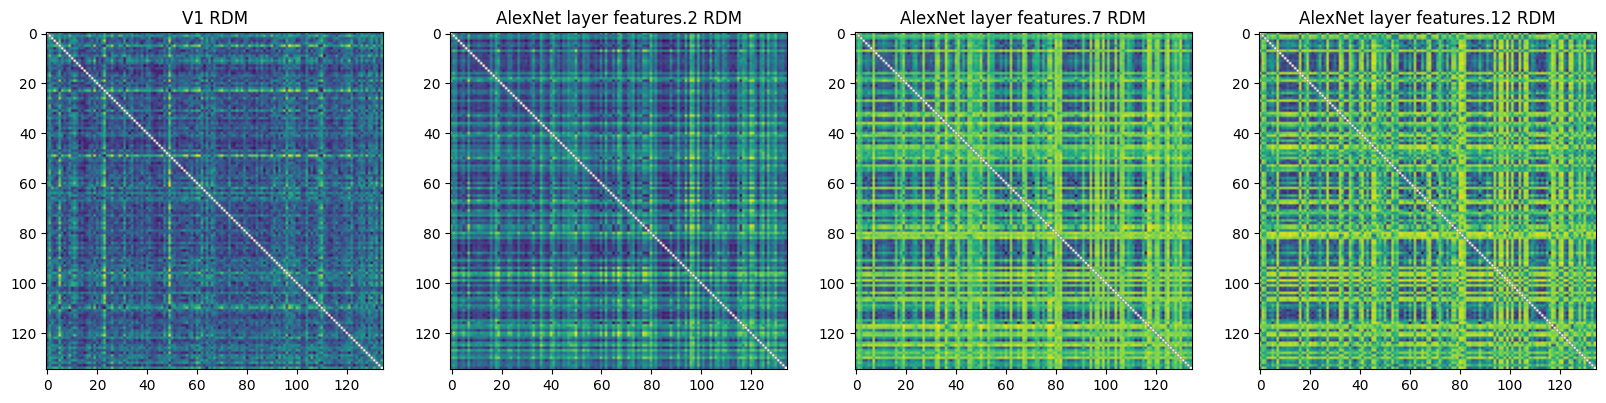

In [163]:
# compute RDMs
layer_rdms = []
for layer in layers:
    layer_rdms.append(
        rdm(alexnet_assemblies[layer].transpose('presentation', 'neuroid').values)
    )

v1_rdm = rdm(v1_average.transpose('presentation', 'neuroid_id').values)

# set the diagonals to nan
s = v1_rdm.shape[0]
for layer_rdm in layer_rdms:
    layer_rdm[range(s),range(s)] = np.nan
v1_rdm[range(s),range(s)] = np.nan

# compute them visually
fig, axes = pyplot.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(v1_rdm)
axes[0].set_title("V1 RDM")
for i, layer_rdm in enumerate(layer_rdms):
    axes[i+1].imshow(layer_rdm)
    axes[i+1].set_title(f"AlexNet layer {layers[i]} RDM")
pyplot.show()

At first glance, AlexNet-features.2 appear to yield an RDM more similar to that of V1 than other layers.

To quantify the similarity, we can compare two RDMs by simply correlated all the coefficients (or entries) $A_{i,j}$ and $B_{i,j}$, except when $i<=j$: when $i< j$, it repeats the values in the case $j< i$ since the correlation matrix has diagonal symmetry; when $i=j$, the values are always $0$ (a stimulus is always similar to itself).


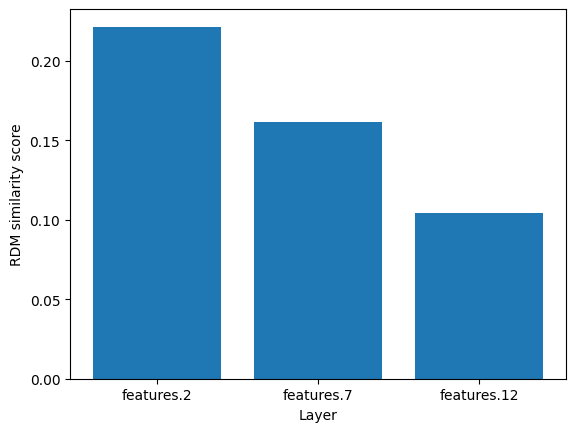

In [167]:
def rdm_similarity_score(rdm1, rdm2):
    rdm1_upper_tri = rdm1[np.triu_indices(rdm1.shape[0], k=1)]
    rdm2_upper_tri = rdm2[np.triu_indices(rdm2.shape[0], k=1)]
    return np.corrcoef(rdm1_upper_tri, rdm2_upper_tri)[0, 1]

# also, a wrapped-up function here
def eval_rsa(model_layer_assembly, neural_average):
    layer_rdm = rdm(model_layer_assembly.transpose('presentation', 'neuroid').values)
    neural_rdm = rdm(neural_average.transpose('presentation', 'neuroid_id').values)
    return rdm_similarity_score(neural_rdm, layer_rdm)

layer_scores = []
for layer_rdm in layer_rdms:
    layer_scores.append(rdm_similarity_score(v1_rdm, layer_rdm))

pyplot.bar(layers, layer_scores)
pyplot.ylabel('RDM similarity score')
pyplot.xlabel('Layer')
pyplot.show()

We got some decent alignment from the ealier layer `features.2` from AlexNet to the V1, which is better than that from the later layers.

#### Linear decoding

Another much more straightforward way to evaluate model-brain alignment is through linear decoding: we assess how well the model's activations can predict actual neural responses.

Specifically, we train a linear decoder to map model activations to V1 neural responses using the **training split**, and evaluate its performance on the **held-out test split**. This procedure is analogous to the linear probing strategy described earlier.

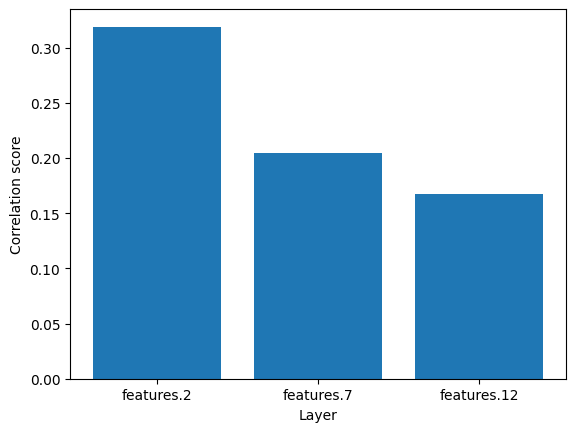

In [166]:
import numpy as np
from sklearn.linear_model import RidgeCV

# here we use correlation score to evaluate the model prediction
def correlation_score(model_prediction, neural_recording):
    # for each neuron, we correlate over the stimuli
    num_stimuli, num_neuron = model_prediction.shape
    scores = []
    for n in range(num_neuron):
        mp = model_prediction[:, n]
        nr = neural_recording[:, n]
        scores.append(np.corrcoef(mp, nr)[0, 1])

    # take the median alignment over neurons
    final_score = np.median(scores)
    return final_score

# edit codes from linear probing and wrap them into a function
def eval_linear_decoding(model_layer_assembly, neural_average):
    stimulus_ids = neural_average['stimulus_id'].values
    train_stimuli, val_stimuli = train_test_split(stimulus_ids, train_size=0.8, random_state=1)

    train_model = model_layer_assembly[{"presentation": [stimulus_id in train_stimuli for stimulus_id in stimulus_ids]}]
    val_model = model_layer_assembly[{"presentation": [stimulus_id in val_stimuli for stimulus_id in stimulus_ids]}]

    train_neural = neural_average[{"presentation": [stimulus_id in train_stimuli for stimulus_id in stimulus_ids]}]
    val_neural = neural_average[{"presentation": [stimulus_id in val_stimuli for stimulus_id in stimulus_ids]}]

    train_x = train_model.transpose('presentation', 'neuroid').values
    train_y = train_neural.transpose('presentation', 'neuroid_id').values
    val_x = val_model.transpose('presentation', 'neuroid').values
    val_y = val_neural.transpose('presentation', 'neuroid_id').values

    scaler = StandardScaler().fit(train_x)
    train_x = scaler.transform(train_x)
    val_x = scaler.transform(val_x)

    # use a robust linear regression
    linear_readout = RidgeCV()
    linear_readout.fit(train_x, train_y)
    pred_y = linear_readout.predict(val_x)
    score = correlation_score(pred_y, val_y)

    return score

layer_scores = []
for layer in layers:
    score = eval_linear_decoding(alexnet_assemblies[layer], v1_average)
    layer_scores.append(score)

pyplot.bar(layers, layer_scores)
pyplot.ylabel('Correlation score')
pyplot.xlabel('Layer')
pyplot.show()

Once again, we got better alignment from the ealier layer `features.2` than that from the later layers.

Given the ventral stream hierarchy (V1 → V2 → V4 → IT), early visual encodings in V1 may align more closely with earlier layers of AlexNet, while object-level representations in IT likely correspond to later layers. Investigating this correspondence could reveal deeper insights into hierarchical feature processing across biological and artificial vision systems.

### Alignment between AlexNet and IT

Here we apply the two metrics (RSA & linear decoding) on a completely different dataset with IT recordings.

Let's again walk through the entire pipeline step by step, from data inspection to model alignment.

In [168]:
data = brainscore_vision.load_dataset('MajajHong2015.public')

# we'll focus on only IT recordings in this exercise
it_data = data.sel(region='IT')

### SUBSAMPLING START
# to make our life easier, we only work on a subset (135 samples) of the data this time
stimulus_ids = it_data['stimulus_id'].values
target_stimuli = np.unique(stimulus_ids)[:135]
stimulus_mask = [stimulus_id in target_stimuli for stimulus_id in stimulus_ids]
it_data = it_data.isel(presentation=stimulus_mask)
stimulus_set = it_data.stimulus_set
stimulus_set = stimulus_set[stimulus_set['stimulus_id'].isin(target_stimuli)]
it_data.attrs["stimulus_set"] = stimulus_set
### SUBSAMPLING END

it_data

<xarray.NeuronRecordingAssembly 'dicarlo.MajajHong2015.public' (neuroid: 168,
                                                                presentation: 6402,
                                                                time_bin: 1)>
dask.array<getitem, shape=(168, 6402, 1), dtype=float32, chunksize=(168, 6402, 1), chunktype=numpy.ndarray>
Coordinates:
  * neuroid          (neuroid) MultiIndex
  - neuroid_id       (neuroid) object 'Chabo_L_M_5_9' ... 'Tito_L_M_8_0'
  - arr              (neuroid) object 'M' 'M' 'M' 'M' 'M' ... 'M' 'M' 'M' 'M'
  - col              (neuroid) int64 9 9 8 9 8 8 7 7 5 6 ... 1 0 1 0 1 0 0 1 1 0
  - hemisphere       (neuroid) object 'L' 'L' 'L' 'L' 'L' ... 'L' 'L' 'L' 'L'
  - subregion        (neuroid) object 'cIT' 'cIT' 'cIT' ... 'pIT' 'pIT' 'pIT'
  - animal           (neuroid) object 'Chabo' 'Chabo' 'Chabo' ... 'Tito' 'Tito'
  - y                (neuroid) float64 0.2 0.6 0.2 1.0 0.6 ... 1.0 1.0 1.8 1.4
  - x                (neuroid) float64 1.8 1.8 1.4 1.8 ... -1.8 -1.4 -1.4 -1.8
  - row              (neuroid) int64 5 6 5 7 6 7 9 7 9 8 ... 4 4 5 5 6 6 7 7 9 8
  * presentation     (presentation) MultiIndex
  - image_id         (presentation) object '056f1926e188b83b4b0b22aaf420ccbfe...
  - repetition       (presentation) int64 18 18 18 18 19 19 ... 17 17 17 16 17
  - stimulus         (presentation) int64 285 307 249 325 149 ... 70 68 2532 4
  - stimulus_id      (presentation) object '056f1926e188b83b4b0b22aaf420ccbfe...
  - id               (presentation) int64 283 304 247 322 ... 711 709 3163 645
  - background_id    (presentation) object 'c00896abe056c1b1549540002668f753e...
  - s                (presentation) float64 1.0 1.0 1.0 ... 1.038 1.016 1.217
  - image_file_name  (presentation) object 'Strawberry_obj_rx-90.000_ry+00.00...
  - filename         (presentation) object 'Strawberry_obj_rx-90.000_ry+00.00...
  - rxy              (presentation) float64 -0.0 -0.0 -0.0 ... -17.87 1.919
  - tz               (presentation) float64 0.0 0.0 0.0 ... 0.543 -0.218 0.598
  - category_name    (presentation) object 'Fruits' 'Boats' ... 'Cars' 'Chairs'
  - rxz_semantic     (presentation) float64 0.0 0.0 0.0 ... 37.01 -16.4 -35.34
  - ty               (presentation) float64 0.0 0.0 0.0 ... 0.156 0.274 0.198
  - ryz              (presentation) float64 -0.0 -0.0 -0.0 ... -41.77 -44.67
  - object_name      (presentation) object 'strawberry' 'ship5' ... 'chair2'
  - variation        (presentation) int64 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3
  - size             (presentation) float64 256.0 256.0 256.0 ... 256.0 256.0
  - rxy_semantic     (presentation) float64 -0.0 90.0 -0.0 ... 59.19 72.13 1.919
  - ryz_semantic     (presentation) float64 -0.0 -0.0 -0.0 ... -41.77 -44.67
  - rxz              (presentation) float64 0.0 0.0 0.0 ... 37.01 -16.4 -35.34
  * time_bin         (time_bin) MultiIndex
  - time_bin_start   (time_bin) int64 70
  - time_bin_end     (time_bin) int64 170
Attributes:
    stimulus_set_identifier:  hvm-public
    stimulus_set:                     id                             backgrou...
    identifier:               dicarlo.MajajHong2015.public

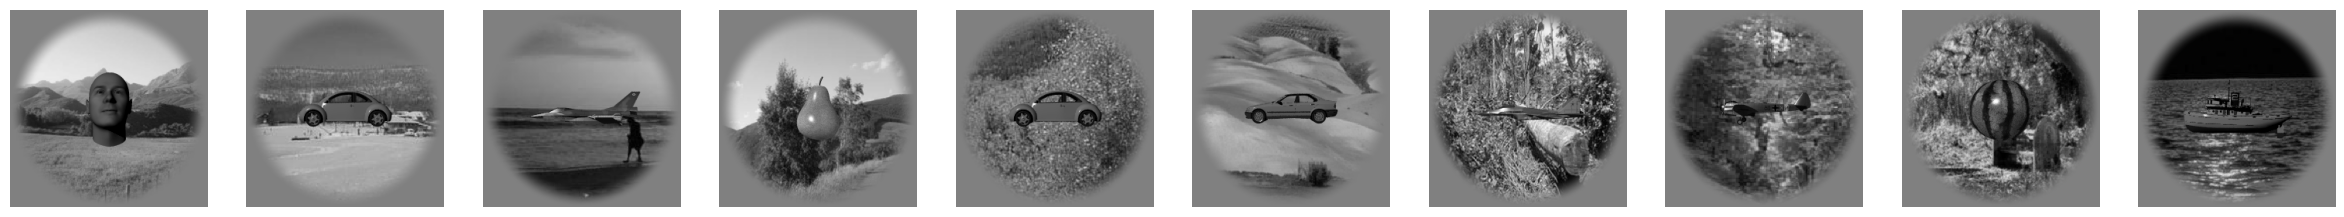

In [169]:
# visualization
stimuli = it_data.stimulus_set

fig, axes = pyplot.subplots(nrows=1, ncols=10, figsize=(30, 3))
for i, ax in enumerate(axes.flatten()):
    current_stimulus_id = stimuli['stimulus_id'].values[i]  # accessing a stimulus
    # use a method 'get_stimulus' of StimulusSet to get the stimulus storage path given the id
    image_path = stimuli.get_stimulus(current_stimulus_id)
    # show the image using matplotlib
    image_content = image.imread(image_path)
    ax.imshow(image_content, cmap='gray')
    ax.set_axis_off()
pyplot.show()

In [170]:
# averaging the data
time_average = it_data.squeeze('time_bin')  # this dataset is already time averaged
it_average = average_repetition(time_average)

### START a small monkey patch here
it_average = it_average.reset_index("neuroid").rename(neuroid="neuroid_id")
### END

inspect_without_attrs(it_average)

<xarray.NeuronRecordingAssembly 'dicarlo.MajajHong2015.public' (
                                                                neuroid_id: 168,
                                                                presentation: 135)>
dask.array<transpose, shape=(168, 135), dtype=float32, chunksize=(168, 1), chunktype=numpy.ndarray>
Coordinates:
    time_bin         object (70, 170)
  * presentation     (presentation) MultiIndex
  - image_id         (presentation) object '0015b49a190e9bce70b108b28dc1a0674...
  - stimulus         (presentation) int64 212 161 1734 1634 ... 1746 428 1997
  - stimulus_id      (presentation) object '0015b49a190e9bce70b108b28dc1a0674...
  - id               (presentation) int64 210 802 2367 2268 ... 2379 1067 2630
  - background_id    (presentation) object '561c84a23fcc11df50a1c441a23d19cb4...
  - s                (presentation) float64 1.0 1.133 0.9617 ... 1.299 1.203
  - image_file_name  (presentation) object 'DTUG_L_rx+00.000_ry+00.000_rz+00....
  - filename         (presentation) object 'DTUG_L_rx+00.000_ry+00.000_rz+00....
  - rxy              (presentation) float64 -0.0 19.93 -41.9 ... -4.881 -14.42
  - tz               (presentation) float64 0.0 0.009 0.549 ... 0.277 0.26
  - category_name    (presentation) object 'Boats' 'Animals' ... 'Fruits'
  - rxz_semantic     (presentation) float64 0.0 43.35 13.67 ... 39.69 4.46 18.55
  - ty               (presentation) float64 0.0 0.068 -0.263 ... 0.242 -0.253
  - ryz              (presentation) float64 -0.0 38.46 23.85 ... 28.79 70.65
  - object_name      (presentation) object 'ship2' 'bear' ... 'strawberry'
  - variation        (presentation) int64 0 3 3 3 3 3 3 3 3 ... 3 3 3 0 3 3 3 3
  - size             (presentation) float64 256.0 256.0 256.0 ... 256.0 256.0
  - rxy_semantic     (presentation) float64 90.0 109.9 -131.9 ... -24.03 -14.42
  - ryz_semantic     (presentation) float64 -0.0 38.46 23.85 ... -59.22 70.65
  - rxz              (presentation) float64 0.0 43.35 13.67 ... -23.96 18.55
  * neuroid_id       (neuroid_id) object 'Chabo_L_M_5_9' ... 'Tito_L_M_8_0'
    arr              (neuroid_id) object 'M' 'M' 'M' 'M' 'M' ... 'M' 'M' 'M' 'M'
    col              (neuroid_id) int64 9 9 8 9 8 8 7 7 5 ... 0 1 0 1 0 0 1 1 0
    hemisphere       (neuroid_id) object 'L' 'L' 'L' 'L' 'L' ... 'L' 'L' 'L' 'L'
    subregion        (neuroid_id) object 'cIT' 'cIT' 'cIT' ... 'pIT' 'pIT' 'pIT'
    animal           (neuroid_id) object 'Chabo' 'Chabo' ... 'Tito' 'Tito'
    y                (neuroid_id) float64 0.2 0.6 0.2 1.0 ... 1.0 1.0 1.8 1.4
    x                (neuroid_id) float64 1.8 1.8 1.4 1.8 ... -1.4 -1.4 -1.8
    row              (neuroid_id) int64 5 6 5 7 6 7 9 7 9 ... 4 5 5 6 6 7 7 9 8

In [171]:
# get the activations from AlexNet on the same stimulus set
alexnet_assemblies = {}
for layer in layers:
    alexnet_assemblies[layer] = NeuroidAssembly(xr.open_dataarray(f"alexnet_majajhong2015_{layer}.nc"))

# align the presentations
for layer in layers:
    alexnet_assemblies[layer] = alexnet_assemblies[layer].sortby('stimulus_id')
    assert (alexnet_assemblies[layer]['stimulus_id'].values == it_average['stimulus_id'].values).all()

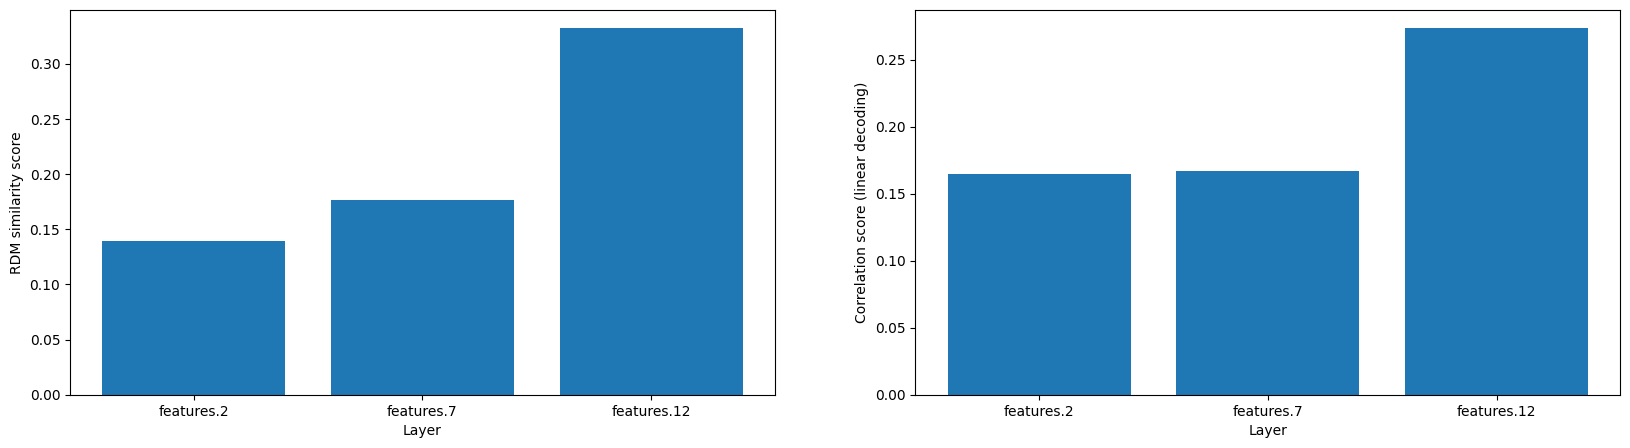

In [172]:
# compute alignment with RSA and linear decoding
rsa_layer_scores = []
ld_layer_scores = []
for layer in layers:
    rsa_layer_scores.append(eval_rsa(alexnet_assemblies[layer], it_average))
    ld_layer_scores.append(eval_linear_decoding(alexnet_assemblies[layer], it_average))

_, axes = pyplot.subplots(1, 2, figsize=(20, 5))
axes[0].bar(layers, rsa_layer_scores)
axes[0].set_ylabel('RDM similarity score')
axes[0].set_xlabel('Layer')
axes[1].bar(layers, ld_layer_scores)
axes[1].set_ylabel('Correlation score (linear decoding)')
axes[1].set_xlabel('Layer')
pyplot.show()

As expected, the higher layer `features.12` from AlexNet performs better on both metrics compared to the earlier layers.

This suggests that AlexNet captures not only ventral-stream-aligned features, but does so in a **hierarchical** fashion, with higher layers increasingly resembling the representations found along the ventral visual pathway.

### Compute alignment with BrainScore

The BrainScore platform not only provides **datasets**, but also **models** and **metrics**. It is easy to use BrainScore to evaluate a model on some dataset-metric combination (called a **benchmark**).

In the following, we give an example on the FreemanZiemba2013 V1 dataset again.

In [173]:
from brainscore_vision import load_model, load_benchmark

# this benchmark =
# V1 data from FreemanZiemba2013
# +
# pls metric (partial least square regression)
benchmark = load_benchmark('FreemanZiemba2013public.V1-pls')


model_1 = load_model("alexnet")
model_2 = load_model("resnet50_primary_visual_cortex")  # let's load another good model for comparison

# by calling the benchmark on a model, it internally conducts the procedures of
# activation extraction, layer selection, and scores aggregation.
score_1 = benchmark(model_1)
score_2 = benchmark(model_2)

print(f"AlexNet: {score_1}")
print(f"ResNet50 (PVC): {score_2}")

# AlexNet: <xarray.Score ()>
# array(0.29724034)
# Attributes:
#     error:    <xarray.Score ()>\narray(0.00816442)
#     raw:      <xarray.Score ()>\narray(0.48018941)\nAttributes:\n    raw:    ...
#     ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...

# ResNet50 (PVC): <xarray.Score ()>
# array(0.40957723)
# Attributes:
#     error:    <xarray.Score ()>\narray(0.00738373)
#     raw:      <xarray.Score ()>\narray(0.56367218)\nAttributes:\n    raw:    ...
#     ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...

cross-validation: 100%|██████████| 10/10 [05:13<00:00, 31.31s/it]

AlexNet: <xarray.Score ()>
array(0.29724034)
Attributes:
    error:    <xarray.Score ()>\narray(0.00816442)
    raw:      <xarray.Score ()>\narray(0.48018941)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
ResNet50 (PVC): <xarray.Score ()>
array(0.40957723)
Attributes:
    error:    <xarray.Score ()>\narray(0.00738373)
    raw:      <xarray.Score ()>\narray(0.56367218)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...


We can see a large difference in the V1 alignment between AlexNet and ResNet50-PVC.